<a href="https://colab.research.google.com/github/ttollefson11/IS4487/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv')

Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10) 

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June
5,351,Glenn Reville,3 Springview Drive,Dallas,TX,75277.0,1006,2020-02-18,351,1006,106,4.0,106,Great value Juice,$1.99,$7.96,2020-02,February
6,233,Cosette Berkowitz,7619 Susan Lane,South Bend,IN,46634.0,1007,2019-10-25,233,1007,105,2.0,105,Office Chair,$55.99,$111.98,2019-10,October
7,121,Nisse Cunniam,0 Dennis Pass,Lincoln,NE,68531.0,1008,2019-11-10,121,1008,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2019-11,November
8,232,Yank Eayrs,8176 Lawn Drive,Washington,DC,20575.0,1009,2019-09-27,232,1009,110,1.0,110,Apple iPad Mini,$329.99,$329.99,2019-09,September
9,113,Jamesy Brothwood,0693 Evergreen Pass,Scranton,PA,18514.0,1010,2019-09-02,113,1010,108,1.0,108,Printer,$59.99,$59.99,2019-09,September


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [5]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


## Clean up the data

Clean up the data in a  new datafram named "df_clean"


In [10]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8981 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       8981 non-null   int64  
 1   customer_name     8981 non-null   object 
 2   address_line_1    8981 non-null   object 
 3   city              8981 non-null   object 
 4   state_province    8981 non-null   object 
 5   postal_code       8981 non-null   float64
 6   order_id          8981 non-null   int64  
 7   order_date        8981 non-null   object 
 8   customer_id.1     8981 non-null   int64  
 9   order_id.1        8981 non-null   int64  
 10  product_id        8981 non-null   int64  
 11  quantity          8981 non-null   float64
 12  product_id.1      8981 non-null   int64  
 13  product_name      8981 non-null   object 
 14  product_price     8981 non-null   object 
 15  total_amount      8981 non-null   float64
 16  order_year_month  8981 non-null   object 


In [6]:
df_copy = df
df_copy['total_amount'] = df_copy['total_amount'].str.replace(',', '')
df_copy['total_amount'] = df_copy['total_amount'].str.replace('$', '')
df_copy['total_amount'] = df_copy['total_amount'].astype('float')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   float64
 16  order_year_month  9312 non-null   object 


<ipython-input-6-f82e6a2d4a2e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['total_amount'] = df_copy['total_amount'].str.replace('$', '')


Function to fix the issues with the customer state_province

In [7]:
def clean_state(col):
  state = col
  if col == 'Alabama':
    state = 'AL'
  if col == 'Alaska':
    state = 'AK'
  if col == 'Arizona':
    state = 'AZ'
  if col == 'Arkansas':
    state = 'AR'
  if col == 'California':
    state = 'CA'
  if col == 'Colorado':
    state = 'CO'
  if col == 'Connecticut':
    state = 'CT'
  if col == 'Delaware':
    state = 'DE'
  if col == 'District of Columbia':
    state = 'DC'
  if col == 'Florida':
    state = 'FL'
  if col == 'Georgia':
    state = 'GA'
  if col == 'Hawaii':
    state = 'HI'
  if col == 'Idaho':
    state = 'ID'
  if col == 'Illinois':
    state = 'IL'
  if col == 'Indiana':
    state = 'IN'
  if col == 'Iowa':
    state = 'IA'
  if col == 'Kansas':
    state = 'KS'
  if col == 'Kentucky':
    state = 'KY'
  if col == 'Louisiana':
    state = 'LA'
  if col == 'Maine':
    state = 'ME'
  if col == 'Maryland':
    state = 'MD'
  if col == 'Massachusetts':
    state = 'MA'
  if col == 'Michigan':
    state = 'MI'
  if col == 'Minnesota':
    state = 'MN'
  if col == 'Mississippi':
    state = 'MS'
  if col == 'Missouri':
    state = 'MO'
  if col == 'Montana':
    state = 'MT'
  if col == 'Nebraska':
    state = 'NE'
  if col == 'Nevada':
    state = 'NV'
  if col == 'New Hampshire':
    state = 'NH'
  if col == 'New Jersey':
    state = 'NJ'
  if col == 'New Mexico':
    state = 'NM'
  if col == 'New York':
    state = 'NY'
  if col == 'North Carolina':
    state = 'NC'
  if col == 'North Dakota':
    state = 'ND'
  if col == 'Ohio':
    state = 'OH'
  if col == 'Oklahoma':
    state = 'OK'
  if col == 'Oregon':
    state = 'OR'
  if col == 'Pennsylvania':
    state = 'PA'
  if col == 'Rhode Island':
    state = 'RI'
  if col == 'South Carolina':
    state = 'SC'
  if col == 'South Dakota':
    state = 'SD'
  if col == 'Tennessee':
    state = 'TN'
  if col == 'Texas':
    state = 'TX'
  if col == 'Utah':
    state = 'UT'
  if col == 'Vermont':
    state = 'VT'
  if col == 'Virginia':
    state = 'VA'
  if col == 'Washington':
    state = 'WA'
  if col == 'West Virginia':
    state = 'WV'
  if col == 'Wisonsin':
    state = 'WI'
  if col == 'Wyoming':
    state = 'WY'
  return state

In [8]:
df_copy['state_province'] = df_copy['state_province'].apply(clean_state)

## Visualize the Data

Plot the total number of orders and revenue by state.

<AxesSubplot:xlabel='state_province'>

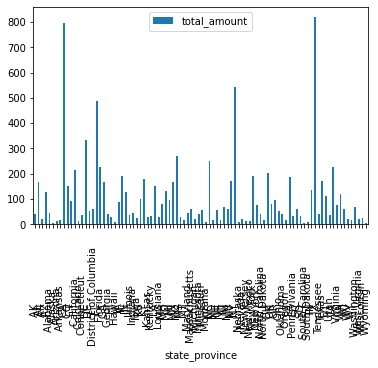

In [9]:
df_copy[['state_province','total_amount']].groupby('state_province').count().plot.bar()